/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


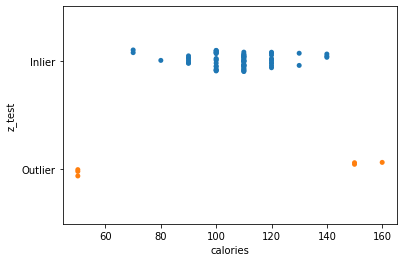

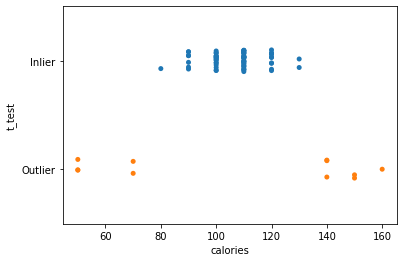

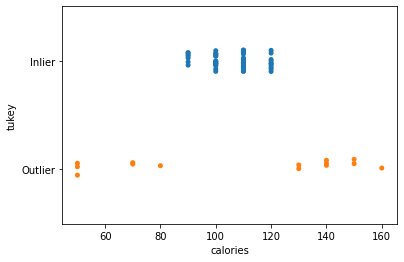

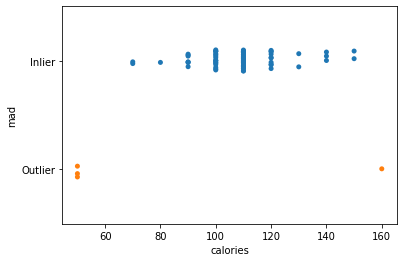

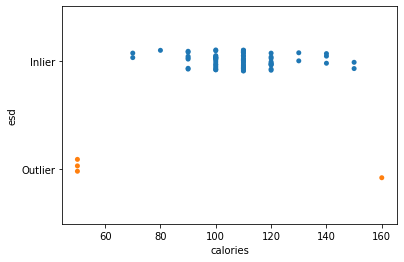

In [4]:
from probabilistic import * 
import seaborn as sns 
import matplotlib.pyplot as plt 

def get_iris():
    csv_url = '../ext/iris.data'
    col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
    iris =  pd.read_csv(csv_url, names = col_names)
    return iris

def get_cereal():
    csv_url = '../ext/cereal.csv'
    cereal =  pd.read_csv(csv_url)
    return cereal

data = get_cereal()
data['z_test'] = 'Inlier' 
data['t_test'] = 'Inlier' 
data['tukey'] = 'Inlier'  
data['mad'] = 'Inlier' 
data['esd'] = 'Inlier'

data['z_test'].iloc[z_score(data,3,0.05),] = 'Outlier' 
data['t_test'].iloc[z_score(data,3,0.05,dist='t'),]= 'Outlier' 
data['tukey'].iloc[tukey_iqr(data,3),] = 'Outlier' 
data['mad'].iloc[mad_score(data,3),] = 'Outlier' 
data['esd'].iloc[generalized_esd(data,3,20,alpha=.1),] = 'Outlier'

#dmelt = data[['calories','z_test','t_test','tukey','mad']].melt(id_vars='calories')
tests = ['z_test','t_test','tukey','mad','esd']
for test in tests:
    sns.stripplot(x=data['calories'], y=data[test],order=['Inlier','Outlier'])
    #sns.scatterplot(data['calories'],np.arange(data.shape[0]),hue=data[test])
    plt.show()


In [2]:
data

name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  ...  vitamins  shelf  weight  cups     rating   z_test  \
0     5.0       6  ...        25      3     1.0  0.33  68.402973   Inlier   
1     8.0       8  ...         0      3     1.0  1.00  33.983679   Inlier   
2     7.0       5  ...        25      3     1.0  0.33  59.425505   Inlier   
3     8.0       0  ...        25      3     1.0  0.50  93.704912  Outlier   
4    14.0       8  ...        25      3     1.0  0.75  34.384843   Inlier   
..    ...     ...  ...       ...    ...     ...   ...        ...      ...   
72   21.0       3  ...        25      3     1.0  0.75  39.106174   Inlier   
73   13.0      12  ...        25      2     1.0  1.00  27.753301   Inlier   
74   17.0       3  ...        25      1     1.0  0.67  49.787445   Inlier   
75   17.0       3  ...        25      1     1.0  1.00  51.592193   Inlier   
76   16.0       8  ...        25      1     1.0  0.75  36.187559   Inlier   

     t_test    tukey      mad      esd  
0   Outlier  Outlier   Inlier   Inlier  
1    Inlier   Inlier   Inlier   Inlier  
2   Outlier  Outlier   Inlier   Inlier  
3   Outlier  Outlier  Outlier  Outlier  
4    Inlier   Inlier   Inlier   Inlier  
..      ...      ...      ...      ...  
72   Inlier   Inlier   Inlier   Inlier  
73   Inlier   Inlier   Inlier   Inlier  
74   Inlier   Inlier   Inlier   Inlier  
75   Inlier   Inlier   Inlier   Inlier  
76   Inlier   Inlier   Inlier   Inlier  

[77 rows x 21 columns]

In [16]:
import numpy as np 
inlier = np.random.normal(0,1,30)
outlier = np.random.normal(5,5,10)
#outlier2 = np.random.normal(-10,10,5)
outlier_benchmark_univariate = np.hstack([inlier,outlier])
for i in outlier_benchmark_univariate:
    print(f"{i:.5f}")

-7.11279
4.40690
-8.12760
2.90166
-7.39454
-8.20821
-1.02174
-1.17156
4.84553
0.32326
-4.05155
4.32082
1.12966
-0.12280
-9.17130
7.15182
6.71745
7.95990
3.99190
3.81792
-1.06547
-1.82014
-3.44551
-3.40540
-7.56521
0.26844
-6.52158
-6.49981
5.03885
5.40764
10.85011
0.38752
9.28394
-0.20090
8.45703
0.52893
-1.38456
10.01432
-3.98492
7.24413


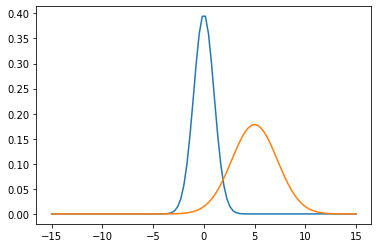

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 15*sigma, mu + 15*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, 5, math.sqrt(5)))
plt.show()